In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from tabulate import tabulate


In [20]:
df = pd.read_csv('Mall_Customers.csv')


In [21]:
print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   KMeans Cluster  GMM Cluster  
0               4            4  
1               2            2  
2               4            4  
3               2            2  
4               4            4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    

In [22]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


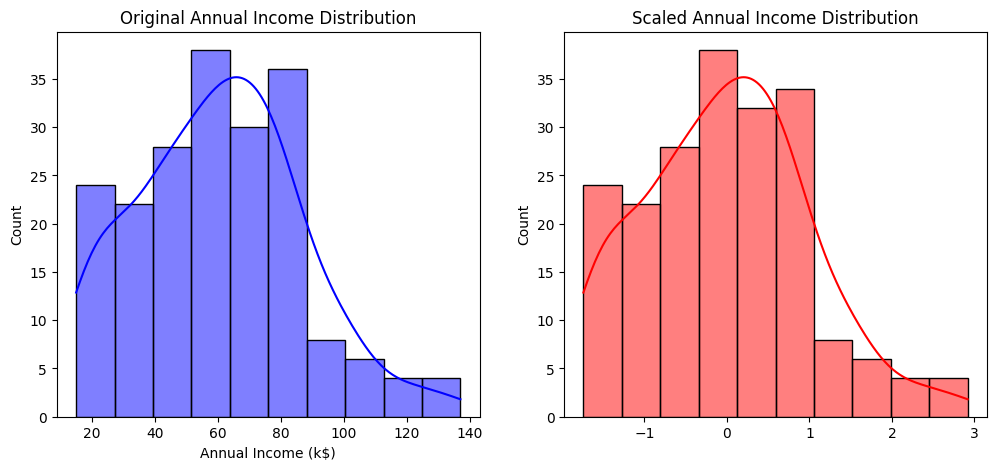

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data['Annual Income (k$)'], ax=axes[0], kde=True, color='blue')
axes[0].set_title('Original Annual Income Distribution')
sns.histplot(data_scaled[:, 0], ax=axes[1], kde=True, color='red')
axes[1].set_title('Scaled Annual Income Distribution')
plt.show()



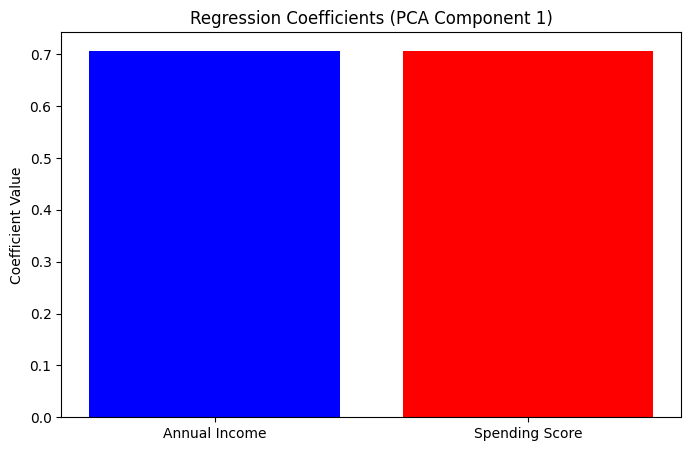

In [24]:
pca = PCA(n_components=2)
pca.fit(data_scaled)
plt.figure(figsize=(8, 5))
plt.bar(['Annual Income', 'Spending Score'], pca.components_[0], color=['blue', 'red'])
plt.title('Regression Coefficients (PCA Component 1)')
plt.ylabel('Coefficient Value')
plt.show()



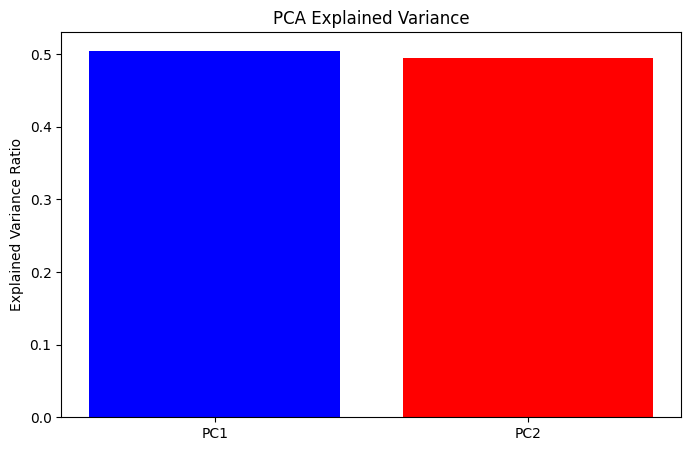

In [25]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(['PC1', 'PC2'], explained_variance, color=['blue', 'red'])
plt.title('PCA Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [26]:
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)


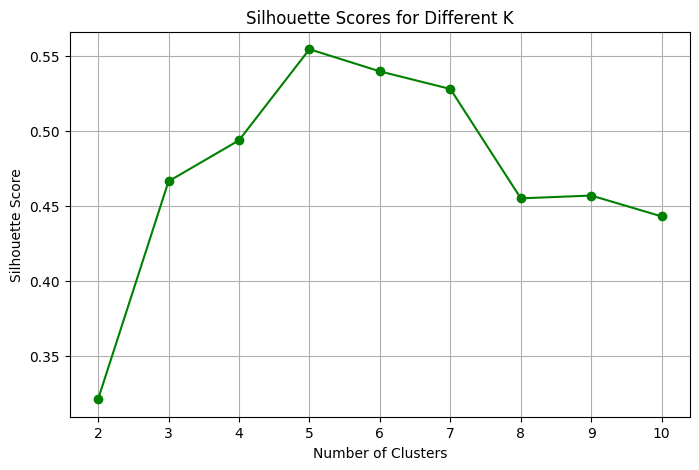

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


In [28]:
best_k = np.argmax(silhouette_scores) + 2
print(f'Optimal K found: {best_k} with silhouette score: {max(silhouette_scores):.4f}')

Optimal K found: 5 with silhouette score: 0.5547


In [29]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['KMeans Cluster'] = kmeans.fit_predict(data_scaled)


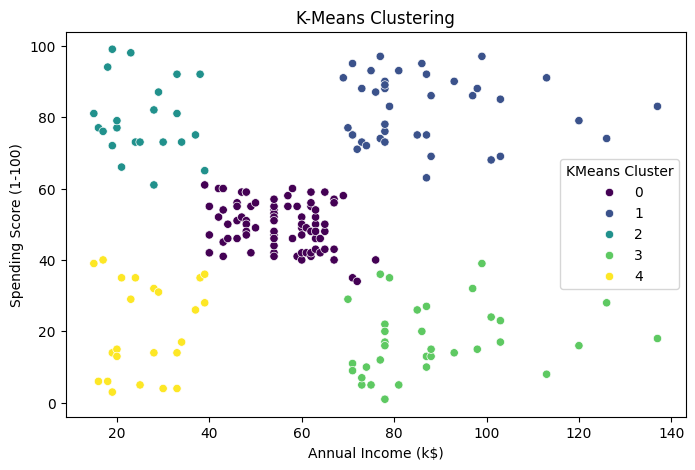

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['KMeans Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [31]:
gmm = GaussianMixture(n_components=best_k, random_state=42)
df['GMM Cluster'] = gmm.fit_predict(data_scaled)


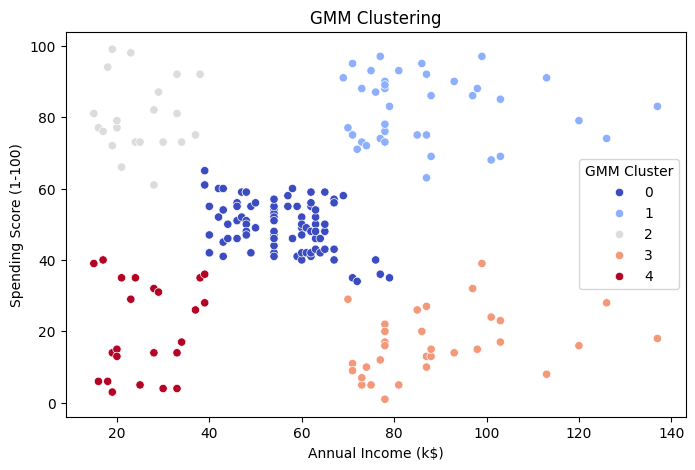

In [32]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['GMM Cluster'], palette='coolwarm')
plt.title('GMM Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [33]:
kmeans_profile = df.groupby('KMeans Cluster').agg({'Annual Income (k$)': ['mean', 'count'], 'Spending Score (1-100)': ['mean']})
gmm_profile = df.groupby('GMM Cluster').agg({'Annual Income (k$)': ['mean', 'count'], 'Spending Score (1-100)': ['mean']})

print("K-Means Cluster Profiling:")
print(tabulate(kmeans_profile, headers='keys', tablefmt='grid'))

print("\nGMM Cluster Profiling:")
print(tabulate(gmm_profile, headers='keys', tablefmt='grid'))


K-Means Cluster Profiling:
+------------------+----------------------------------+-----------------------------------+--------------------------------------+
|   KMeans Cluster |   ('Annual Income (k$)', 'mean') |   ('Annual Income (k$)', 'count') |   ('Spending Score (1-100)', 'mean') |
+==================+==================================+===================================+======================================+
|                0 |                          55.2963 |                                81 |                              49.5185 |
+------------------+----------------------------------+-----------------------------------+--------------------------------------+
|                1 |                          86.5385 |                                39 |                              82.1282 |
+------------------+----------------------------------+-----------------------------------+--------------------------------------+
|                2 |                          25.7273 | 

In [34]:
df.to_csv('Segmented_Customers.csv', index=False)
print("Segmented data saved successfully.")

Segmented data saved successfully.
